## Import subtitles_lines data from a pickle object

In [14]:
import pickle

with open('./results/subtitles_lines.pkl', 'rb') as f:
    subtitles_lines = pickle.load(f)

In [16]:
%time
from nltk.tokenize import word_tokenize

sentences = []
for subtitle_lines in subtitles_lines:
    # first three sentences and the last one are not to be used
    for line in subtitle_lines[3:-1]:
        sentences.append(word_tokenize(line))

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


In [17]:
len(sentences)

112094

## Word2Vec model

In [18]:
from gensim.models import Word2Vec
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

In [19]:
# example
# from nltk.corpus import movie_reviews
# sentences = [list(s) for s in movie_reviews.sents()]

In [20]:
%%time
model = Word2Vec(sentences)

CPU times: user 3.25 s, sys: 9.27 ms, total: 3.26 s
Wall time: 1.26 s


In [21]:
model.init_sims(replace=True)

In [31]:
model.wv.most_similar(positive=['Ross', 'Emily'], negative=['Mark'])

[('Joey', 0.8530470132827759),
 ('Rachel', 0.8306350111961365),
 ('Chandler', 0.8290776014328003),
 ('Phoebe', 0.7952206134796143),
 ('Monica', 0.7923144102096558),
 ('everybody', 0.6021765470504761),
 ('Ben', 0.5854109525680542),
 ('Mike', 0.5837360620498657),
 ('Emma', 0.5800467729568481),
 ('Mom', 0.5544910430908203)]

## embedding distance between NE objects

In [37]:
import json

In [63]:
#  I extracted only these two types because other types has no object.
person_objects = None
gpe_objects = None

with open('./results/object_class.json', 'r') as f:
    lines = f.readlines()
    for line in lines:
        obj = json.loads(line)
        if obj["title"] == "PERSON":
#             person_objects = json.loads("["+obj["objects"]+"]")
            person_objects = json.loads(obj["objects"])
        elif obj["title"] == "GPE":
#             gpe_objects = json.loads("["+obj["objects"]+"]")
            gpe_objects = json.loads(obj["objects"])

### for PERSON obejcts

### for GPE objects

## Visualize word2vec vectors (option)

In [32]:
# visualization
from sklearn.manifold import TSNE
import pandas as pd
import re
import matplotlib.pyplot as plt

In [33]:
vocab = list(model.wv.vocab)
X = model[vocab]

In [34]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

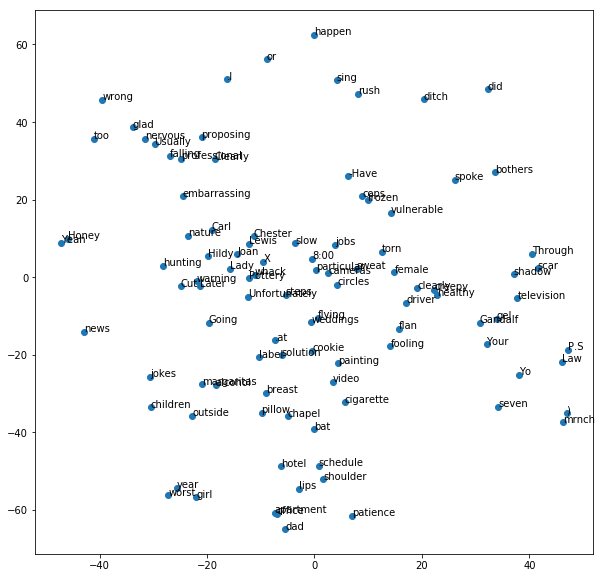

In [35]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
df = df[:100]

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)